In [3]:
# 4.11 Loading the Reuters dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
  num_words=10000)

In [4]:
# 4.12 Decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
  [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results

In [6]:
# 4.13 Encoding the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# 4.14 Encoding the labels
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [8]:
# from tensorflow.keras.utils import to_categorical

# y_train = to_categorical(train_labels)
# y_test = to_categorical(test_labels)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
# 4.15 Model definition
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

In [24]:
# 4.16 Compiling the model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [25]:
# 4.18 Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 14ms/step - loss: 2.5450 - accuracy: 0.5421 - val_loss: 1.6839 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 1.3859 - accuracy: 0.7107 - val_loss: 1.2887 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.0205 - accuracy: 0.7840 - val_loss: 1.1199 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.7985 - accuracy: 0.8300 - val_loss: 1.0105 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6337 - accuracy: 0.8666 - val_loss: 0.9656 - val_accuracy: 0.8100
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.5058 - accuracy: 0.8950 - val_loss: 0.9293 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4064 - accuracy: 0.9153 - val_loss: 0.9021 - val_accuracy: 0.8140
Epoch 8/20
16/16 [=

In [ ]:
import matplotlib.pyplot as plt

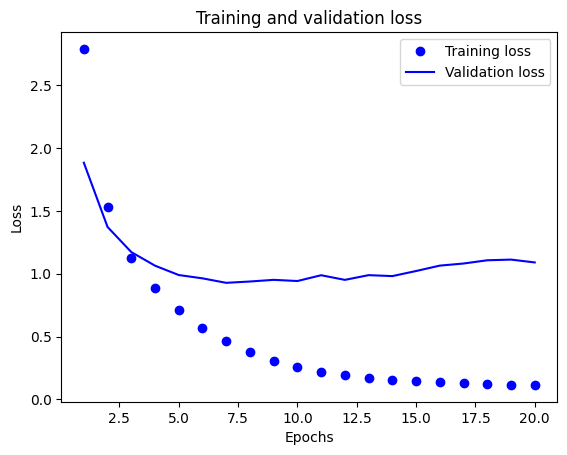

In [13]:
# 4.19 Plotting the training and validation loss
history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss") # "bo" is for "blue dot"
plt.plot(epochs, val_loss, "b", label="Validation loss") # "b" is for "solid blue line"
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

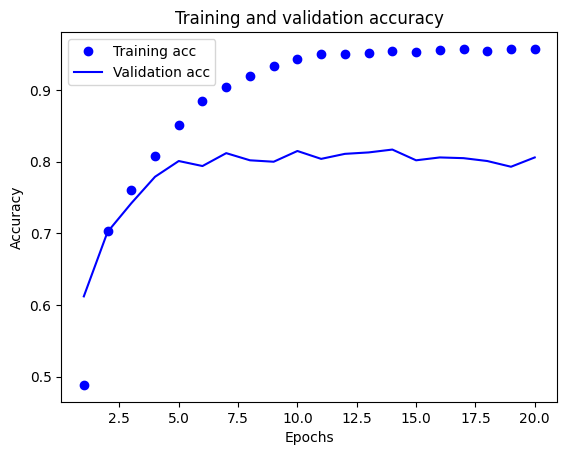

In [14]:
# 4.20 Plotting the training and validation accuracy
plt.clf() # clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
# 4.21 Retraining a model from scract
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 0s 7ms/step - loss: 2.5628 - accuracy: 0.5209
Epoch 2/9
18/18 [==============================] - 0s 7ms/step - loss: 1.3657 - accuracy: 0.7196
Epoch 3/9
18/18 [==============================] - 0s 7ms/step - loss: 1.0050 - accuracy: 0.7858
Epoch 4/9
18/18 [==============================] - 0s 7ms/step - loss: 0.7856 - accuracy: 0.8327
Epoch 5/9
18/18 [==============================] - 0s 7ms/step - loss: 0.6173 - accuracy: 0.8713
Epoch 6/9
18/18 [==============================] - 0s 7ms/step - loss: 0.4907 - accuracy: 0.8977
Epoch 7/9
18/18 [==============================] - 0s 7ms/step - loss: 0.3950 - accuracy: 0.9159
Epoch 8/9
18/18 [==============================] - 0s 7ms/step - loss: 0.3201 - accuracy: 0.9305
Epoch 9/9
71/71 [==============================] - 0s 667us/step - loss: 0.9454 - accuracy: 0.7952


In [16]:
results

[0.9454121589660645, 0.7951914668083191]

In [17]:
# Check the accuracy of a random baseline
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18655387355298308

In [18]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 656us/step


In [19]:
predictions[0].shape

(46,)

In [20]:
np.sum(predictions[0])

0.99999994

In [21]:
np.argmax(predictions[0])

3

In [22]:
# 4.22 A model with an information bottleneck
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(4, activation="relu"),
  layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 0s 14ms/step - loss: 3.4007 - accuracy: 0.3049 - val_loss: 2.9554 - val_accuracy: 0.3480
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 2.6361 - accuracy: 0.3666 - val_loss: 2.3891 - val_accuracy: 0.4490
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 2.1111 - accuracy: 0.5454 - val_loss: 1.9937 - val_accuracy: 0.5770
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 1.7551 - accuracy: 0.6021 - val_loss: 1.7566 - val_accuracy: 0.5830
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 1.5282 - accuracy: 0.6195 - val_loss: 1.6351 - val_accuracy: 0.5880
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 1.3823 - accuracy: 0.6462 - val_loss: 1.5338 - val_accuracy: 0.6220
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 1.2718 - accuracy: 0.6678 - val_loss: 1.4745 - val_accuracy: 0.6380
Epoch 8/20
16/16 [=